#### Importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load the dataset and Split features and target variable

In [2]:
!wget https://archive.ics.uci.edu/static/public/59/letter+recognition.zip
!unzip letter+recognition.zip

--2023-07-05 17:21:26--  https://archive.ics.uci.edu/static/public/59/letter+recognition.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘letter+recognition.zip’

letter+recognition.     [ <=>                ] 378.09K  1.89MB/s    in 0.2s    

2023-07-05 17:21:26 (1.89 MB/s) - ‘letter+recognition.zip’ saved [387167]

Archive:  letter+recognition.zip
  inflating: Index                   
  inflating: letter-recognition.data  
  inflating: letter-recognition.data.Z  
  inflating: letter-recognition.names  


In [3]:
!ls

Index			 letter-recognition.data.Z  letter+recognition.zip
letter-recognition.data  letter-recognition.names   sample_data


In [4]:
# Load the dataset
data = pd.read_csv('letter-recognition.data', header=None)

# Split features and target variable
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20000 non-null  object
 1   1       20000 non-null  int64 
 2   2       20000 non-null  int64 
 3   3       20000 non-null  int64 
 4   4       20000 non-null  int64 
 5   5       20000 non-null  int64 
 6   6       20000 non-null  int64 
 7   7       20000 non-null  int64 
 8   8       20000 non-null  int64 
 9   9       20000 non-null  int64 
 10  10      20000 non-null  int64 
 11  11      20000 non-null  int64 
 12  12      20000 non-null  int64 
 13  13      20000 non-null  int64 
 14  14      20000 non-null  int64 
 15  15      20000 non-null  int64 
 16  16      20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


<Axes: >

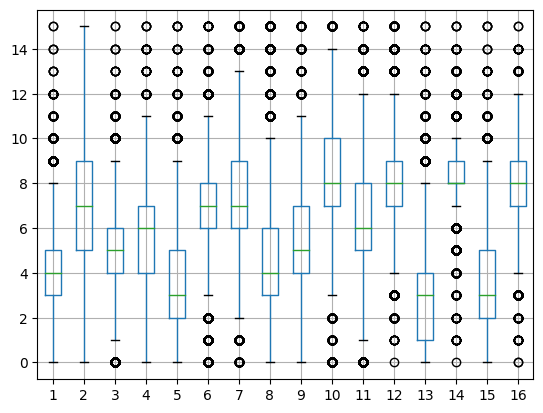

In [8]:
data.boxplot()

#### Splitting the data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create an SVM classifier

In [10]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

#### Create a KNN classifier

In [11]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

#### Create a Decision Tree classifier

In [12]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

#### Create a Random Forest classifier

In [13]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

#### Create a Naive Bayes classifier

In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

#### Compare the accuracies of the models

In [15]:
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

SVM Accuracy: 0.9305
KNN Accuracy: 0.952
Decision Tree Accuracy: 0.88375
Random Forest Accuracy: 0.9615
Naive Bayes Accuracy: 0.648


In [16]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

svm_precision = precision_score(y_test, svm_predictions, average='weighted')
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
nb_precision = precision_score(y_test, nb_predictions, average='weighted')

svm_recall = recall_score(y_test, svm_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')

svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

In [18]:
performance_metrics = pd.DataFrame({
    'Algorithm': ['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [svm_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, nb_accuracy],
    'Precision': [svm_precision, knn_precision, dt_precision, rf_precision, nb_precision],
    'Recall': [svm_recall, knn_recall, dt_recall, rf_recall, nb_recall],
    'F1-Score': [svm_f1, knn_f1, dt_f1, rf_f1, nb_f1]
})

In [19]:
print(performance_metrics)

       Algorithm  Accuracy  Precision   Recall  F1-Score
0            SVM   0.93050   0.934596  0.93050  0.930769
1            KNN   0.95200   0.953141  0.95200  0.952100
2  Decision Tree   0.88375   0.885191  0.88375  0.883893
3  Random Forest   0.96150   0.962628  0.96150  0.961617
4    Naive Bayes   0.64800   0.661838  0.64800  0.644972


## Data visualization

#### Class distribution

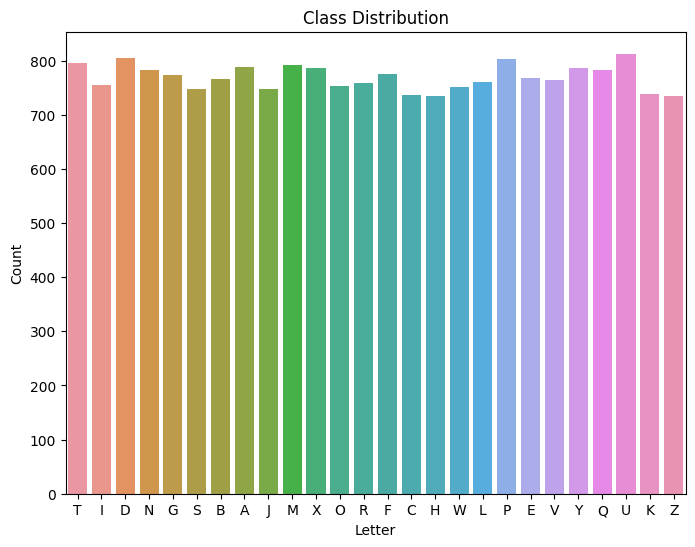

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#### Plotting histograms for each feature

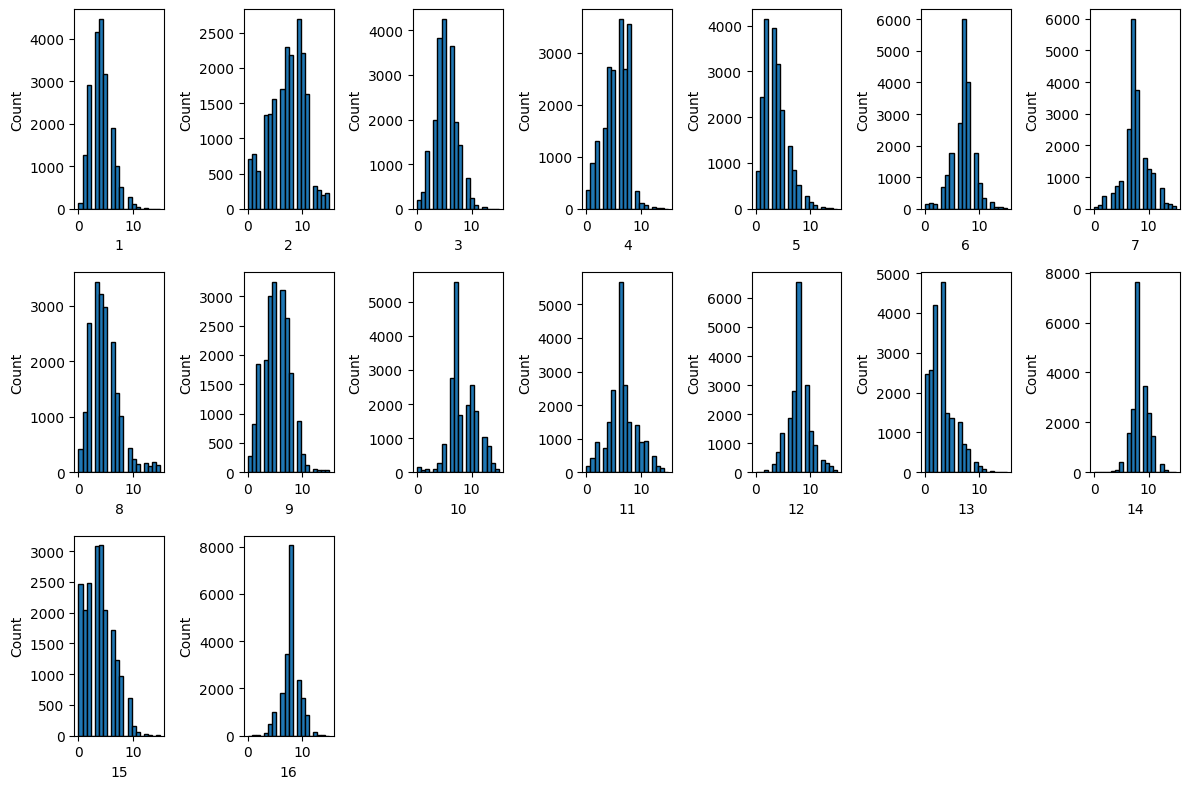

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns):
    plt.subplot(3, 7, i + 1)
    plt.hist(X[column], bins=20, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Plotting each letter

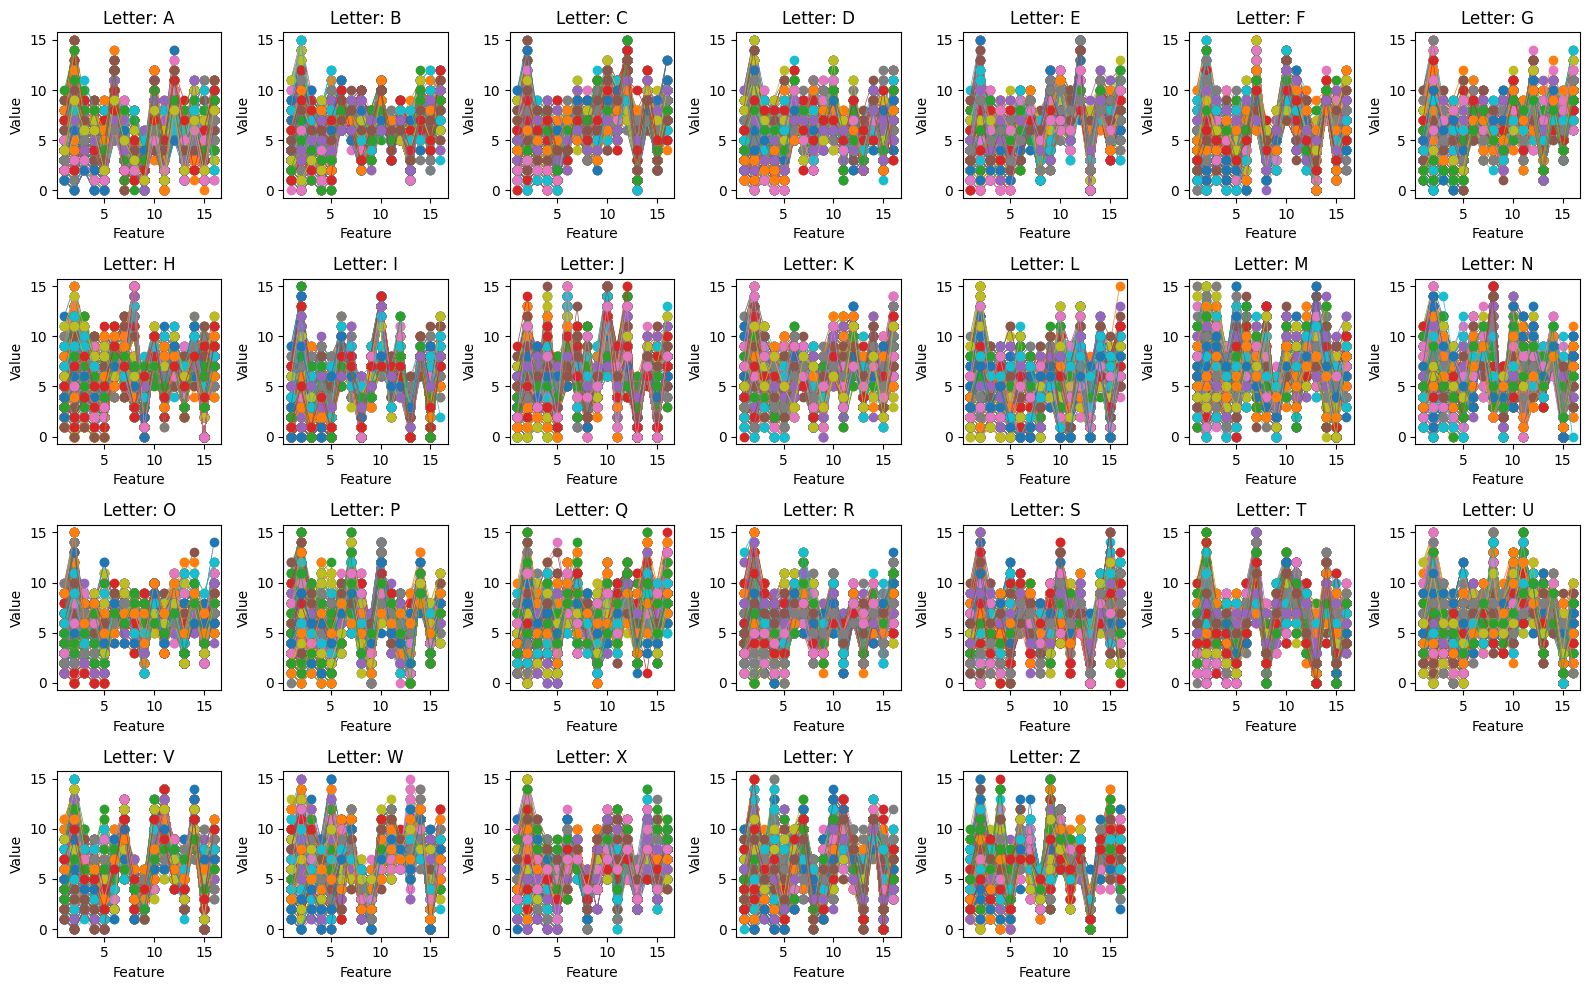

In [ ]:
unique_letters = sorted(data[0].unique())

plt.figure(figsize=(16, 10))
for i, letter in enumerate(unique_letters):
    plt.subplot(4, 7, i + 1)
    letter_data = data[data[0] == letter].drop(columns=0)
    letter_data = letter_data.reset_index(drop=True)
    for j in range(len(letter_data)):
        plt.plot(range(1, len(letter_data.columns) + 1), letter_data.iloc[j, :], marker='o', linewidth=0.5)
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.title(f'Letter: {letter}')
plt.tight_layout()
plt.show()

#### Confusion matrix for SVM

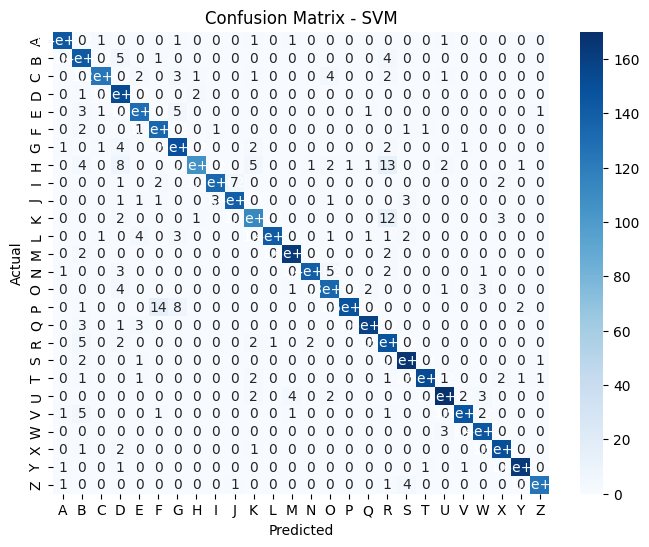

In [ ]:
plt.figure(figsize=(8, 6))
svm_cm = pd.crosstab(y_test, svm_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(svm_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()

#### Confusion matrix for KNN

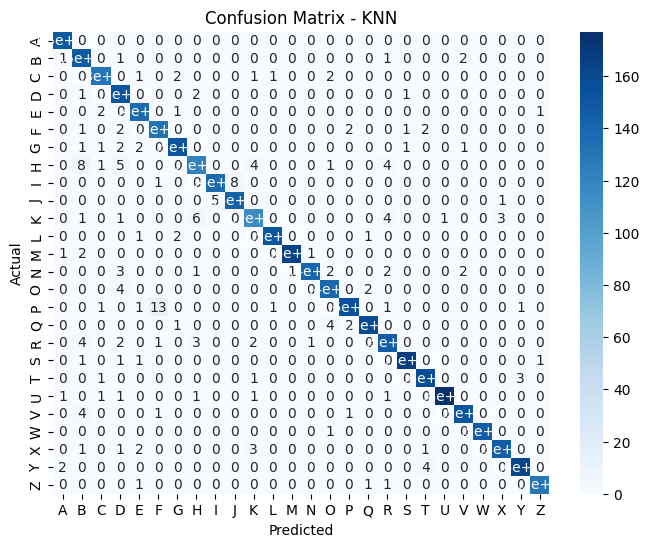

In [ ]:
plt.figure(figsize=(8, 6))
knn_cm = pd.crosstab(y_test, knn_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(knn_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()

#### Confusion matrix for Decision Tree

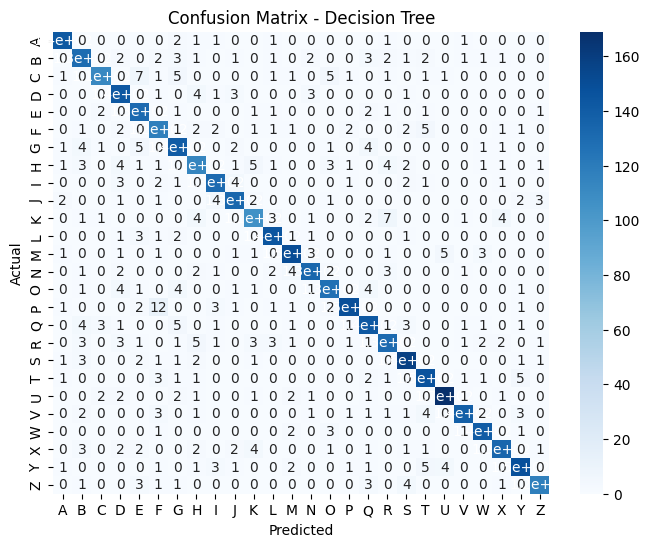

In [ ]:
plt.figure(figsize=(8, 6))
dt_cm = pd.crosstab(y_test, dt_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(dt_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

#### Confusion matrix for Random Forest

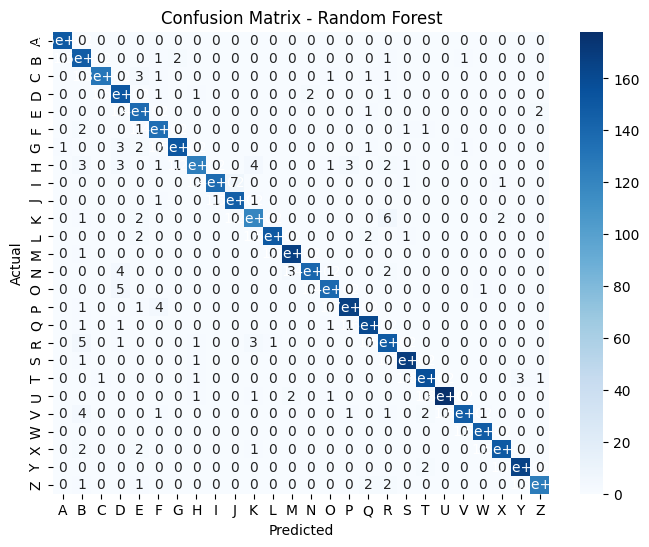

In [20]:
plt.figure(figsize=(8, 6))
rf_cm = pd.crosstab(y_test, rf_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(rf_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

#### Confusion matrix for Naive Bayes

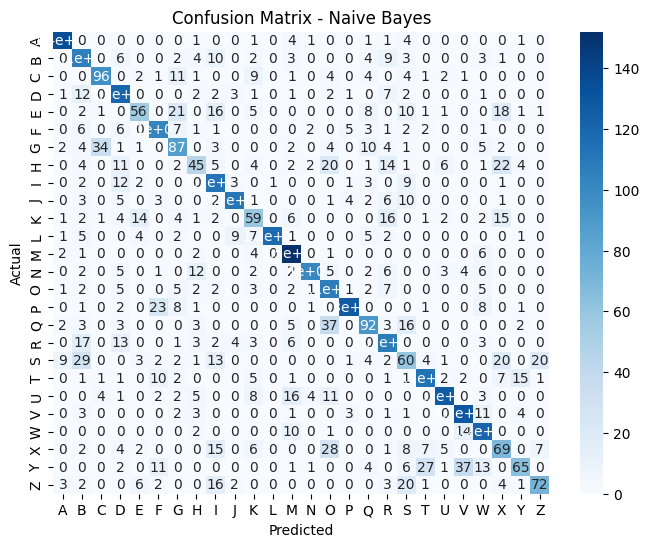

In [21]:
plt.figure(figsize=(8, 6))
nb_cm = pd.crosstab(y_test, nb_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(nb_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

#### Plotting a few input images

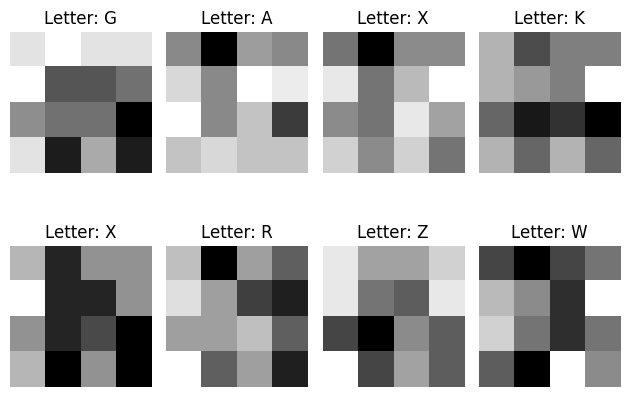

In [23]:
n_examples = 8
example_indices = np.random.choice(range(len(X_train)), size=n_examples, replace=False)

for i, idx in enumerate(example_indices):
    plt.subplot(2, 4, i+1)
    example_image = X_train.iloc[idx, :].values.reshape(4, 4)
    plt.imshow(example_image, cmap='binary')
    plt.title(f"Letter: {y_train.iloc[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#### Comparison of accuracies

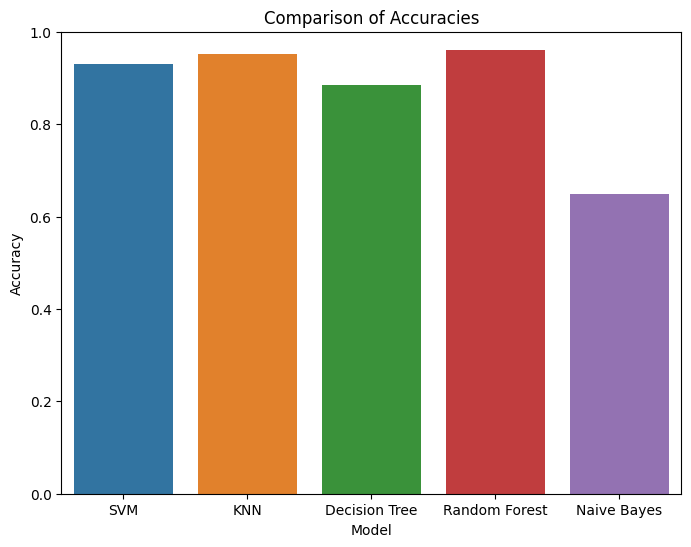

In [22]:
models = ['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
accuracies = [svm_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, nb_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.ylim(0, 1)
plt.show()